In [6]:
import cv2
import torch
import numpy as np
from PIL import Image
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image
from diffusers import ControlNetModel, DiffusionPipeline

input_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")

# get canny image
image = cv2.Canny(np.array(input_image), 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)

# pipe = DiffusionPipeline.from_pretrained(
#     "runwayml/stable-diffusion-v1-5",
#     torch_dtype=torch.float16,
#     use_safetensors=True,
#     controlnet=controlnet,
#     custom_pipeline="stable_diffusion_controlnet_reference").to("cuda:0")

pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16,
    custom_pipeline="stable_diffusion_controlnet_reference").to("cuda:0")

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

result_img = pipe(ref_image=input_image,
            prompt="1girl",
            image=canny_image,
            num_inference_steps=20,
            reference_attn=True,
            reference_adain=True).images[0]

result_img.show()

/opt/conda/envs/diffuser/lib/python3.10/site-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.56it/s]
You have disabled the safety checker for <class 'diffusers_modules.git.stable_diffusion_controlnet_reference.StableDiffusionControlNetReferencePipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


TypeError: object of type 'float' has no len()

In [ ]:
ValueError: Pipeline  expected {'tokenizer', 'feature_extractor', 'vae', 'safety_checker', 'unet', 'scheduler', 'text_encoder', 'controlnet'}, 
but only {'tokenizer', 'feature_extractor', 'vae', 'safety_checker', 'unet', 'scheduler', 'text_encoder'} 
were passed.

/opt/conda/envs/diffuser/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
diffusion_pytorch_model.safetensors not found
100%|██████████| 25/25 [00:05<00:00,  4.59it/s]


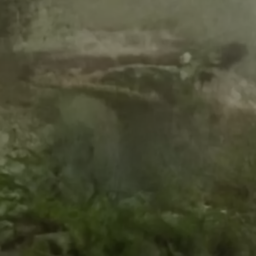

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
    custom_pipeline="stable_diffusion_controlnet_reference")

pipe.to("cuda")

In [ ]:
a = 1


In [3]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", force_download=True, torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
# pipe = DiffusionPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
# )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]


In [4]:
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]

100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


In [2]:
import diffusers as du
du.__version__

/opt/conda/envs/diffuser/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'0.19.3'

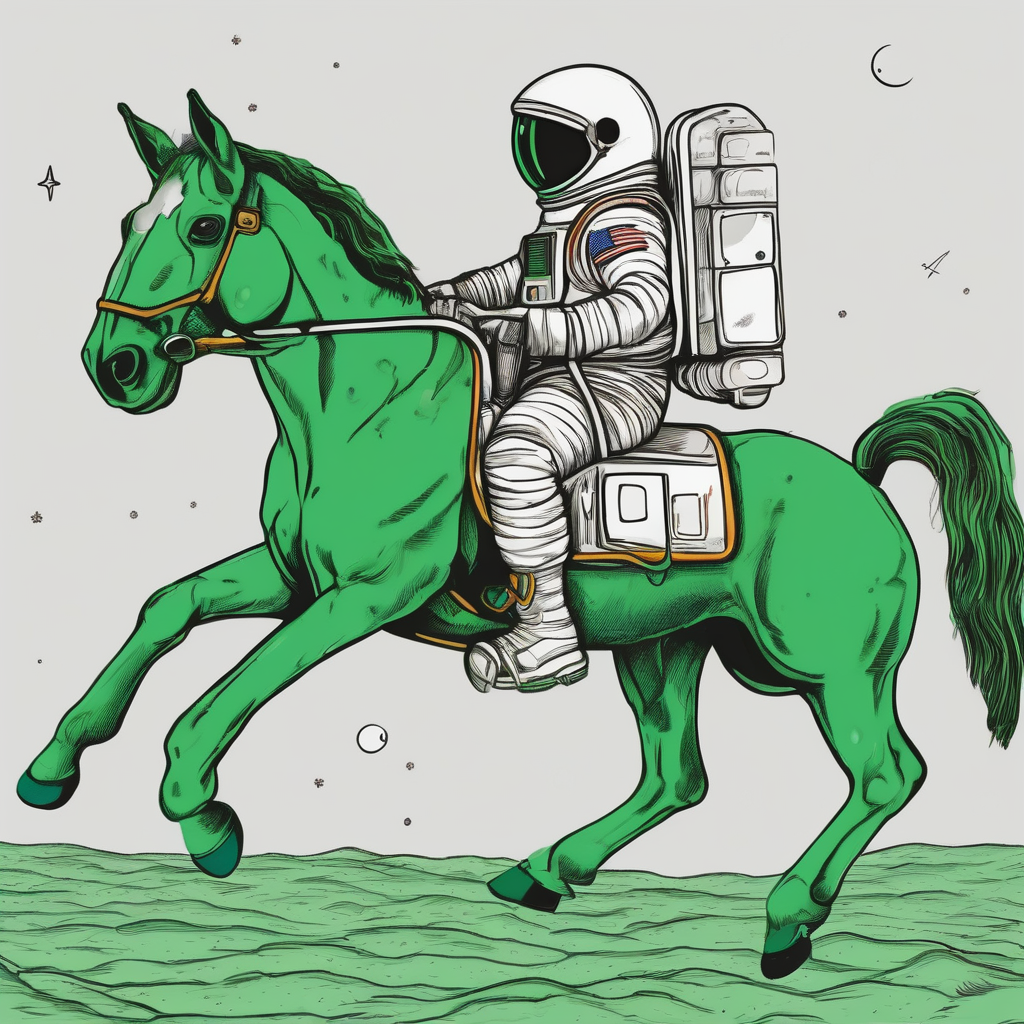

In [5]:
images

In [2]:
import torch
a = torch.tensor([1,2,], dtype=torch.float32)
a.dtype

torch.float32

In [4]:
a = a.to(torch.float16)
a.dtype

torch.float16

In [6]:
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=pipe.text_encoder_2,
    vae=pipe.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)














Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  8.00it/s]


In [34]:
str(refiner.scheduler.compatibles[0])

"<class 'diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler'>"

In [21]:
type(pipe)

diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline

In [4]:
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, revision="fp16")
type(pipe)

text_encoder/model.safetensors not found
Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline

[diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.utils.dummy_torch_and_scipy_objects.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2Discre

In [9]:
refiner.components.keys()

dict_keys(['vae', 'text_encoder', 'text_encoder_2', 'tokenizer', 'tokenizer_2', 'unet', 'scheduler'])

In [2]:
from diffusers import DDPMScheduler, UNet2DModel

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")

In [3]:
scheduler.set_timesteps(50)

In [4]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [5]:
import torch

sample_size = model.config.sample_size

noise = torch.randn((1, 3, sample_size, sample_size)).to("cuda")

In [8]:
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previsously_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previsously_noisy_sample

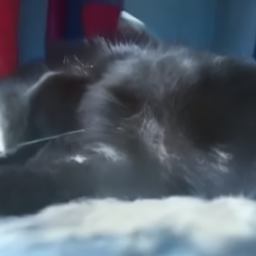

In [9]:
from PIL import Image

import numpy as np

image = (input / 2 + 0.5).clamp(0,1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image*255).round().astype("uint8"))

image

In [2]:
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="text_encoder")
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

/opt/conda/envs/diffuser/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from diffusers import UniPCMultistepScheduler

scheduler = UniPCMultistepScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

In [4]:
torch_device = "cuda"

vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleConv(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features

In [5]:
prompt = ["a photograph of an astronaut riding a horse"]
height = 512
width = 512
num_inference_steps = 25
guidance_scale = 7.5
generator = torch.manual_seed(0)
batch_size = len(prompt)

In [6]:
text_input = tokenizer(
    prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
)

with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

In [7]:
max_length = text_input.input_ids.shape[-1]
unconditional_input = tokenizer([""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt")
unconditional_embeddings = text_encoder(unconditional_input.input_ids.to(torch_device))[0]

In [8]:
# Let’s concatenate the conditional and unconditional embeddings into a batch to avoid doing two forward passes:

text_embeddings = torch.cat([unconditional_embeddings, text_embeddings])


In [10]:
latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8), generator=generator)
latents = latents.to(torch_device)

/tmp/ipykernel_3170/1603221871.py:1: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8), generator=generator)


In [13]:
latents = latents * scheduler.init_noise_sigma

In [16]:
scheduler.set_timesteps(num_inference_steps)
print(num_inference_steps)
scheduler.timesteps

25


tensor([999, 959, 919, 879, 839, 799, 759, 719, 679, 639, 599, 559, 519, 480,
        440, 400, 360, 320, 280, 240, 200, 160, 120,  80,  40])

In [17]:
from tqdm.auto import tqdm

scheduler.set_timesteps(num_inference_steps)

for t in tqdm(scheduler.timesteps):
    # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
    latent_model_input = torch.cat([latents] * 2)

    latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)

    # predict the noise residual
    with torch.no_grad():
        noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

    # perform guidance
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    # compute the previous noisy sample x_t -> x_t-1
    latents = scheduler.step(noise_pred, t, latents).prev_sample

100%|██████████| 25/25 [00:08<00:00,  2.87it/s]


In [19]:
# scale and decode the image latents with vae
latents = 1 / 0.18215 * latents
with torch.no_grad():
    image = vae.decode(latents).sample

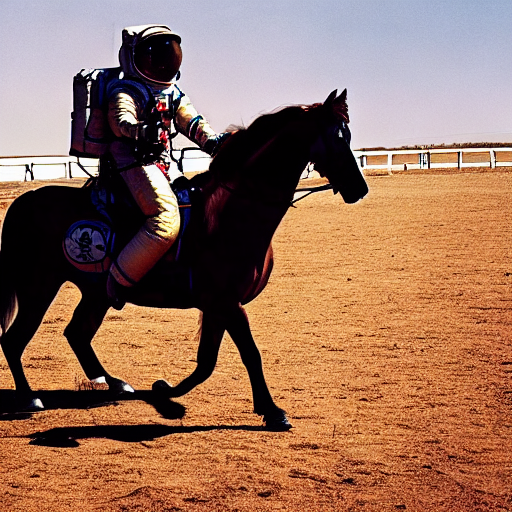

In [20]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]